In [ ]:
# Machine Learning in R
# Repurpose the machine learning code.

In [ ]:
# Loading all the necessary libraries.

install.packages("caret")
library(caret)

install.packages("RCurl")
library(RCurl)

install.packages("skimr")
library(skimr)

install.packages("kernlab")
library(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [ ]:
# loading the Dhfr dataset

dhfr<-read.csv(text=getURL("https://raw.githubusercontent.com/dataprofessor/data/master/dhfr.csv"))
dhfr

Y,moeGao_Abra_L,moeGao_Abra_R,moeGao_Abra_acidity,moeGao_Abra_basicity,moeGao_Abra_pi,moe2D_BCUT_PEOE_0,moe2D_BCUT_PEOE_1,moe2D_BCUT_PEOE_2,moe2D_BCUT_PEOE_3,⋯,moe2D_vdw_vol,moe2D_vsa_acc,moe2D_vsa_base,moe2D_vsa_don,moe2D_vsa_hyd,moe2D_vsa_other,moe2D_vsa_pol,moe2D_weinerPath,moe2D_weinerPol,moe2D_zagreb
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
inactive,2.920765675,1.550487372,2.37563922,4.15921951,1.88819933,-1.6743948,0.1327390,0.4149870,1.88136368,⋯,2.40585802,2.38857079,-0.07106713,1.0351816,0.75440295,1.97832780,4.3083547,3.84070669,1.70203176,2.07607424
inactive,-0.547837899,-0.157313214,0.01009097,0.64659659,0.01859408,0.3807263,-1.6003006,1.5413276,-0.61748930,⋯,-1.09195548,0.53694498,-0.07106713,1.0351816,-1.22950824,-0.06054021,0.2791514,-0.85663784,-1.26277586,-1.04513828
inactive,0.630467139,0.791682749,0.01009097,2.73272633,1.21413711,-0.2164221,-0.5122854,1.1867389,-0.23812548,⋯,0.26090332,2.38857079,-0.07106713,1.0351816,-0.09524678,0.89402742,1.2146993,0.50415717,0.08486397,0.26375729
inactive,-2.089836223,-1.451398618,1.35113559,-0.26710492,-0.96449380,1.7456369,-0.5771585,0.4962240,-1.55765180,⋯,-2.60586890,-1.01312643,-0.07106713,-0.6451038,-2.92797061,0.19892527,0.9746029,-1.70023613,-2.07135975,-2.35403385
inactive,-2.226029922,-1.390615819,0.52404462,0.47178125,-0.82156943,1.1872644,-1.7189257,1.5072959,-1.08757055,⋯,-2.75521045,-0.23809073,-0.07106713,-0.6451038,-2.84342418,-0.06054021,0.4309364,-1.79799892,-2.34088772,-2.65608667
inactive,-2.261226047,-1.433751999,0.52404462,0.57200871,-0.78294123,1.5052265,-3.0312166,2.1451165,-1.18653502,⋯,-2.88844655,0.53694498,-0.07106713,-0.6451038,-2.98614859,-0.06054021,0.8228179,-1.79799892,-2.34088772,-2.65608667
inactive,0.865107969,0.303459619,0.01009097,0.30162765,1.96352434,-1.0539809,1.1188107,-1.3810104,1.16387124,⋯,1.43953030,1.86187399,-0.07106713,1.0351816,1.02227282,1.89650771,0.9490754,1.29887407,1.83679574,1.27060004
inactive,0.349918320,-0.363190437,0.67040228,-0.28342102,0.96112235,-2.2715432,0.9445800,-0.9715318,2.39268014,⋯,1.12620586,0.01161268,-0.07106713,2.7125139,1.02227282,-0.06054021,0.4054090,0.82898194,1.16297583,0.76717867
inactive,0.819199980,-0.008297319,0.01009097,0.30162765,1.74141214,-2.2715432,1.3041625,-1.4084554,2.45040941,⋯,1.52591414,1.86187399,-0.07106713,1.0351816,1.02227282,1.89650771,0.9490754,1.29887407,1.83679574,1.27060004


In [ ]:
# Display summary statistics

summary(dhfr)

summary(dhfr$y)

head(dhfr,5)
tail(dhfr,5)

      Y             moeGao_Abra_L      moeGao_Abra_R      moeGao_Abra_acidity
 Length:325         Min.   :-2.89017   Min.   :-2.76117   Min.   :-0.65022   
 Class :character   1st Qu.:-0.30300   1st Qu.:-0.46515   1st Qu.:-0.65022   
 Mode  :character   Median : 0.08467   Median : 0.03092   Median : 0.01009   
                    Mean   : 0.05876   Mean   : 0.02771   Mean   : 0.03975   
                    3rd Qu.: 0.48764   3rd Qu.: 0.52698   3rd Qu.: 0.28238   
                    Max.   : 3.06359   Max.   : 3.16221   Max.   : 5.84057   
 moeGao_Abra_basicity moeGao_Abra_pi     moe2D_BCUT_PEOE_0  moe2D_BCUT_PEOE_1 
 Min.   :-2.01526     Min.   :-2.84182   Min.   :-2.86094   Min.   :-3.03122  
 1st Qu.:-0.56080     1st Qu.:-0.51254   1st Qu.:-0.51887   1st Qu.:-0.54009  
 Median :-0.02703     Median :-0.04514   Median : 0.11705   Median :-0.12490  
 Mean   : 0.06006     Mean   : 0.01642   Mean   :-0.04996   Mean   : 0.01614  
 3rd Qu.: 0.42283     3rd Qu.: 0.70424   3rd Qu.: 0.40399  

Length  Class   Mode 
     0   NULL   NULL 

,Y,moeGao_Abra_L,moeGao_Abra_R,moeGao_Abra_acidity,moeGao_Abra_basicity,moeGao_Abra_pi,moe2D_BCUT_PEOE_0,moe2D_BCUT_PEOE_1,moe2D_BCUT_PEOE_2,moe2D_BCUT_PEOE_3,⋯,moe2D_vdw_vol,moe2D_vsa_acc,moe2D_vsa_base,moe2D_vsa_don,moe2D_vsa_hyd,moe2D_vsa_other,moe2D_vsa_pol,moe2D_weinerPath,moe2D_weinerPol,moe2D_zagreb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,inactive,2.9207657,1.5504874,2.37563922,4.1592195,1.88819933,-1.6743948,0.1327390,0.414987,1.8813637,⋯,2.4058580,2.3885708,-0.07106713,1.0351816,0.75440295,1.97832780,4.3083547,3.8407067,1.70203176,2.0760742
2,inactive,-0.5478379,-0.1573132,0.01009097,0.6465966,0.01859408,0.3807263,-1.6003006,1.541328,-0.6174893,⋯,-1.0919555,0.5369450,-0.07106713,1.0351816,-1.22950824,-0.06054021,0.2791514,-0.8566378,-1.26277586,-1.0451383
3,inactive,0.6304671,0.7916827,0.01009097,2.7327263,1.21413711,-0.2164221,-0.5122854,1.186739,-0.2381255,⋯,0.2609033,2.3885708,-0.07106713,1.0351816,-0.09524678,0.89402742,1.2146993,0.5041572,0.08486397,0.2637573
4,inactive,-2.0898362,-1.4513986,1.35113559,-0.2671049,-0.96449380,1.7456369,-0.5771585,0.496224,-1.5576518,⋯,-2.6058689,-1.0131264,-0.07106713,-0.6451038,-2.92797061,0.19892527,0.9746029,-1.7002361,-2.07135975,-2.3540338
5,inactive,-2.2260299,-1.3906158,0.52404462,0.4717812,-0.82156943,1.1872644,-1.7189257,1.507296,-1.0875705,⋯,-2.7552105,-0.2380907,-0.07106713,-0.6451038,-2.84342418,-0.06054021,0.4309364,-1.7979989,-2.34088772,-2.6560867


,Y,moeGao_Abra_L,moeGao_Abra_R,moeGao_Abra_acidity,moeGao_Abra_basicity,moeGao_Abra_pi,moe2D_BCUT_PEOE_0,moe2D_BCUT_PEOE_1,moe2D_BCUT_PEOE_2,moe2D_BCUT_PEOE_3,⋯,moe2D_vdw_vol,moe2D_vsa_acc,moe2D_vsa_base,moe2D_vsa_don,moe2D_vsa_hyd,moe2D_vsa_other,moe2D_vsa_pol,moe2D_weinerPath,moe2D_weinerPol,moe2D_zagreb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
321,active,-0.6243512,0.3465958,-0.6502203,0.05921705,-0.1262617,0.3186849,-0.5549163,1.16368515,-0.7659360,⋯,-0.93529326,-0.2380907,-0.07106713,-0.6451038,-0.7063249,-0.06054021,-0.5053014,-0.97016882,-0.8584839,-0.94445400
322,active,2.9411692,1.4151966,3.7745462,3.87718409,2.0118096,-0.8135705,0.9093631,-0.47422934,1.6174584,⋯,2.48931359,2.7296957,-0.07106713,1.0351816,0.5911698,3.06262817,5.1293739,4.50297077,2.3758517,2.68017988
323,active,-0.1907758,0.3779676,-0.6502203,-0.52583163,0.3585223,0.2643987,-0.1693845,-0.13391199,-0.6009952,⋯,0.09252804,0.4455235,-0.07106713,-0.6451038,0.4781622,-0.06054021,-0.1596454,-0.08399641,0.3543919,0.06238874
324,active,2.7014275,1.1681440,3.7745462,3.86086799,2.1566654,-0.8135705,0.4533976,0.04283348,1.6174584,⋯,2.02079106,2.3885708,-0.07106713,1.0351816,0.1056556,3.06262817,4.9568909,4.12138052,2.1063237,2.47881134
325,active,2.8085461,1.4034322,4.4348575,3.41334072,1.9751128,-0.8058153,-0.4029278,0.31179396,1.6174584,⋯,2.21698487,0.8371349,-0.07106713,2.7125139,0.1391394,2.23779328,4.5636296,3.83755305,1.8367957,2.17675851


In [ ]:
# Is any data missing?

sum(is.na(dhfr))

[1] 0

In [ ]:
# Expanded summary statistics

skim(dhfr)

dhfr %>%
  dplyr::group_by(Y) %>%
  skim()

# In output, if molecule is active then +ve or else -ve.

── Data Summary ────────────────────────
                           Values
Name                       dhfr  
Number of rows             325   
Number of columns          229   
_______________________          
Column type frequency:           
  character                1     
  numeric                  228   
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Y                     0             1   6   8     0        2          0

── Variable type: numeric ──────────────────────────────────────────────────────
    skim_variable        n_missing complete_rate      mean    sd       p0
  1 moeGao_Abra_L                0             1  0.0588   0.950  -2.89  
  2 moeGao_Abra_R                0             1  0.0277   0.942  -2.76  
  3 moeGao_Abra_acidity          0             1  0.0397   1.05   -0.650 
  4 moeGao_

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


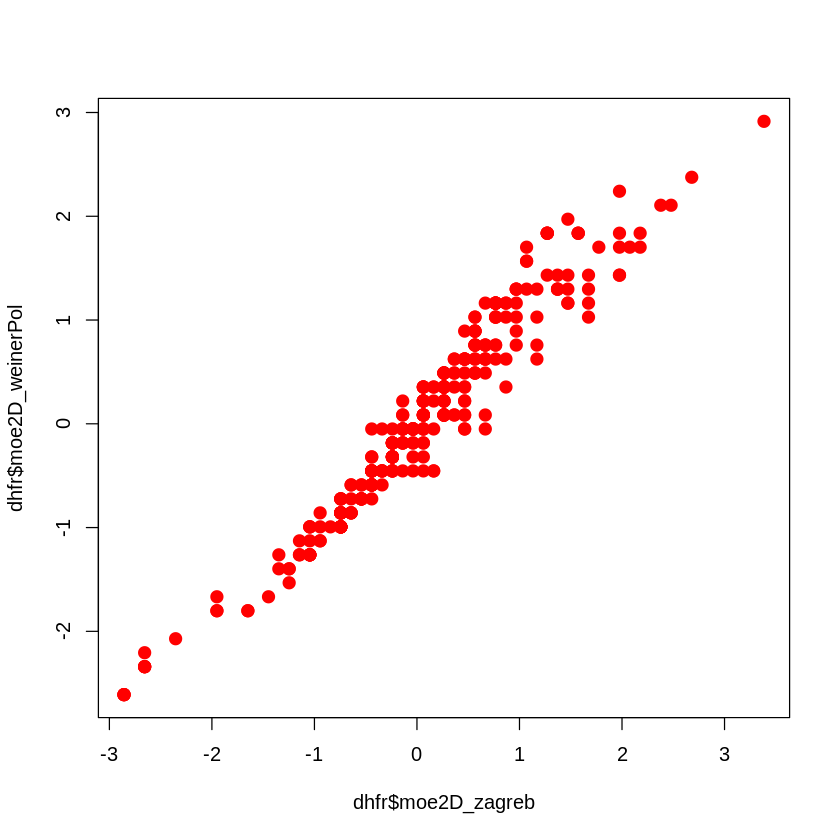

In [ ]:
# Data visualization

plot(dhfr$moe2D_zagreb, dhfr$moe2D_weinerPol, col="red", cex=2, pch=20)

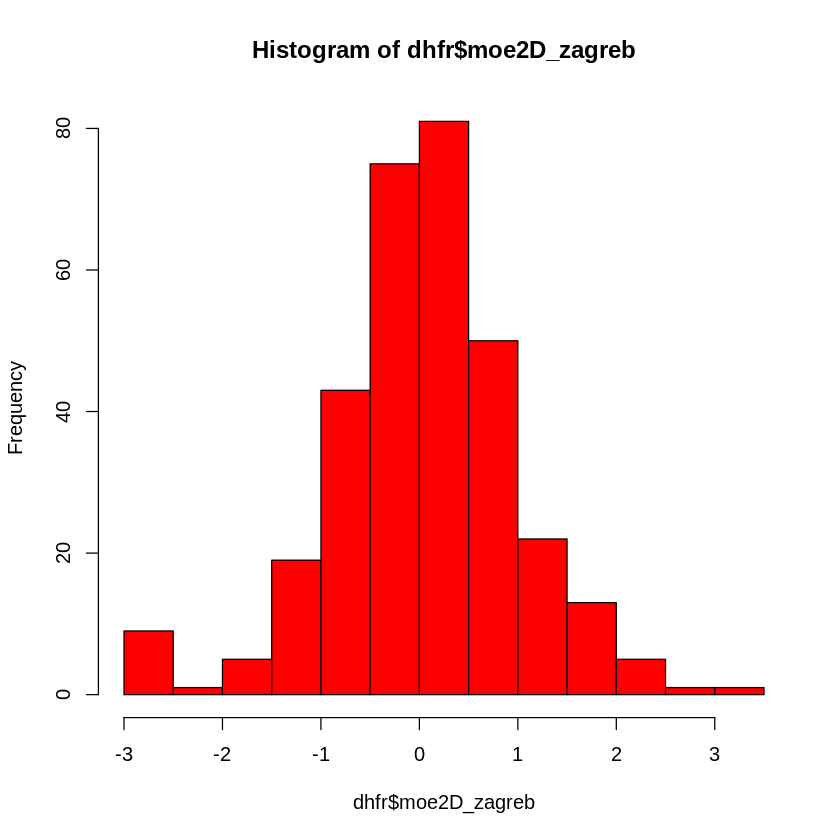

In [ ]:
# Histogram

hist(dhfr$moe2D_zagreb, col="red")

In [ ]:
# Feature plots

featurePlot(x=dhfr[,2:21],
            y=dhfr$Y,
            plot="box",
            strip=strip.custom(par.strip.text=list(cex=.7)),
            scales=list(x=list(relation="free"),
                        y=list(relation="free")))

NULL

In [ ]:
# Building a classification model for the dhfr dataset.

set.seed(100)

Training_index<-createDataPartition(dhfr$Y, p=0.8, list=FALSE)
Training_set<-dhfr[Training_index,]
Testing_set<-dhfr[-Training_index,]

In [ ]:
Model<-train(Y~.,
             data=Training_set,
             method="svmPoly",
             na.action=na.omit,
             preProcess=c("scale","center"),
             trControl=trainControl(method="none"),
             tuneGrid=data.frame(degree=1,scale=1,C=1)
)

Model.cv<-train(Y~.,
             data=Training_set,
             method="svmPoly",
             na.action=na.omit,
             preProcess=c("scale","center"),
             trControl=trainControl(method="cv",number=10),
             tuneGrid=data.frame(degree=1,scale=1,C=1)
)

model.training<-predict(Model, Training_set)
model.testing<-predict(Model, Testing_set)
model.cv<-predict(Model.cv, Training_set)

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: moe2D_FCharge, moe2D_a_base, moeGao_chi4c_C, moeGao_chi4cv_C, moe2D_kS_ddsN, moe2D_vsa_base”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: moe2D_kS_ddssS”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”


In [ ]:
model.training.confusion<-confusionMatrix(as.factor(model.training),as.factor(Training_set$Y))
model.testing.confusion<-confusionMatrix(as.factor(model.testing), as.factor(Testing_set$Y))
model.cv.confusion<-confusionMatrix(as.factor(model.cv), as.factor(Training_set$Y))

# Print the outputs
model.training.confusion
model.testing.confusion
model.cv.confusion

Confusion Matrix and Statistics

          Reference
Prediction active inactive
  active      162        1
  inactive      1       97
                                          
               Accuracy : 0.9923          
                 95% CI : (0.9726, 0.9991)
    No Information Rate : 0.6245          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9837          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9939          
            Specificity : 0.9898          
         Pos Pred Value : 0.9939          
         Neg Pred Value : 0.9898          
             Prevalence : 0.6245          
         Detection Rate : 0.6207          
   Detection Prevalence : 0.6245          
      Balanced Accuracy : 0.9918          
                                          
       'Positive' Class : active          
      

Confusion Matrix and Statistics

          Reference
Prediction active inactive
  active       38        3
  inactive      2       21
                                         
               Accuracy : 0.9219         
                 95% CI : (0.827, 0.9741)
    No Information Rate : 0.625          
    P-Value [Acc > NIR] : 5.916e-08      
                                         
                  Kappa : 0.8319         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9500         
            Specificity : 0.8750         
         Pos Pred Value : 0.9268         
         Neg Pred Value : 0.9130         
             Prevalence : 0.6250         
         Detection Rate : 0.5938         
   Detection Prevalence : 0.6406         
      Balanced Accuracy : 0.9125         
                                         
       'Positive' Class : active         
                          

Confusion Matrix and Statistics

          Reference
Prediction active inactive
  active      162        1
  inactive      1       97
                                          
               Accuracy : 0.9923          
                 95% CI : (0.9726, 0.9991)
    No Information Rate : 0.6245          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9837          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9939          
            Specificity : 0.9898          
         Pos Pred Value : 0.9939          
         Neg Pred Value : 0.9898          
             Prevalence : 0.6245          
         Detection Rate : 0.6207          
   Detection Prevalence : 0.6245          
      Balanced Accuracy : 0.9918          
                                          
       'Positive' Class : active          
      

In [ ]:
# Feature Importance

important<-varImp(Model)
plot(important, col="red", top=20)

#??? Use ggplot perhaps.

Warning message in mean.default(y, rm.na = TRUE):
“argument is not numeric or logical: returning NA”


ERROR: Error in y - mean(y, rm.na = TRUE): non-numeric argument to binary operator
